In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.isnull().sum()  # Check for missing values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('target', axis=1)), columns=df.columns[:-1])
df_scaled['target'] = df['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X = df_scaled.drop('target', axis=1)
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Trees Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
SVM Accuracy: 0.9666666666666667


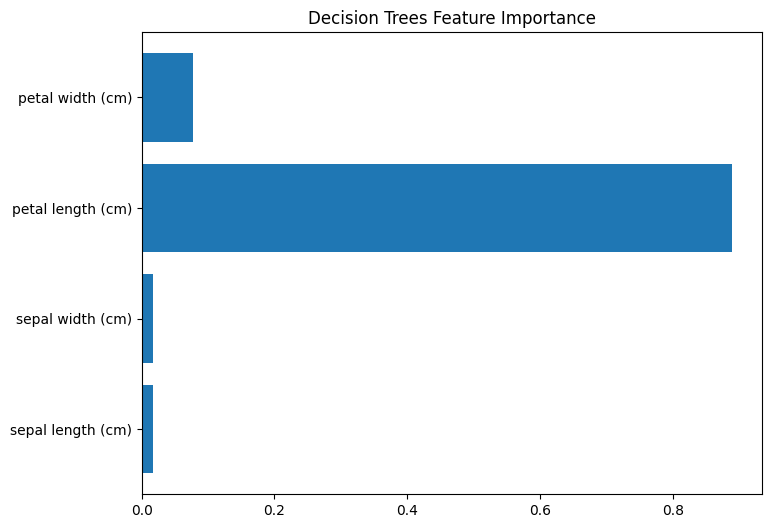

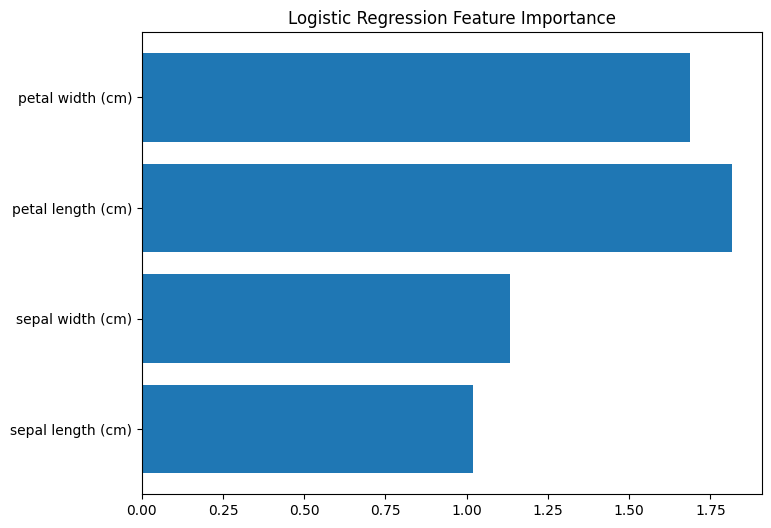

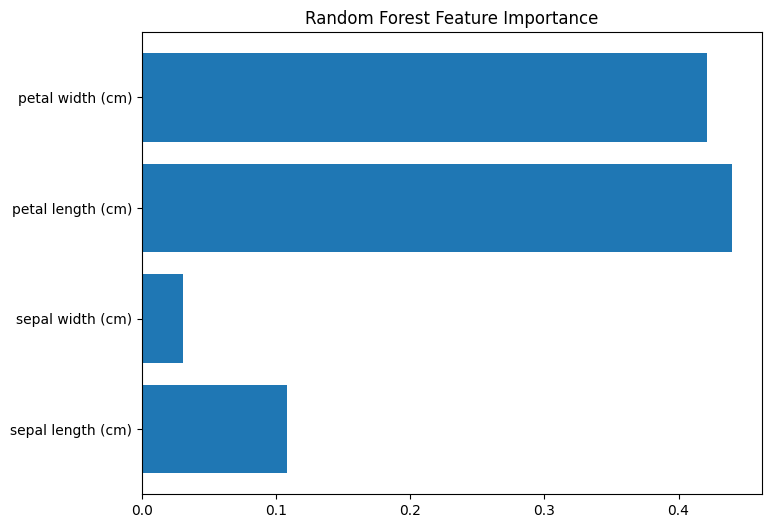

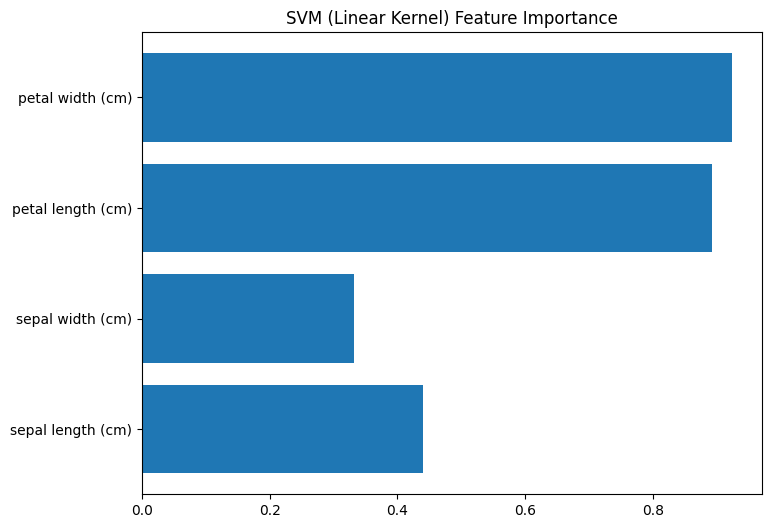

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

# 2. Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# 3. Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# 4. Decision Trees
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Decision Trees Accuracy: {accuracy}")
print(f"Logistic Regression Accuracy: {log_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"SVM Accuracy: {svm_accuracy}")

# Feature Importance Visualization

# Decision Tree Feature Importance
plt.figure(figsize=(8,6))
importance_dt = model.feature_importances_
plt.barh(data.feature_names, importance_dt)
plt.title('Decision Trees Feature Importance')
plt.show()

# Logistic Regression - Feature Importance
plt.figure(figsize=(8,6))
importance = np.abs(log_model.coef_[0])
plt.barh(data.feature_names, importance)
plt.title('Logistic Regression Feature Importance')
plt.show()

# Random Forest - Feature Importance
plt.figure(figsize=(8,6))
importance_rf = rf_model.feature_importances_
plt.barh(data.feature_names, importance_rf)
plt.title('Random Forest Feature Importance')
plt.show()

# SVM - Feature Importance (for linear kernel, based on coefficients)
plt.figure(figsize=(8,6))
importance_svm = np.abs(svm_model.coef_[0])
plt.barh(data.feature_names, importance_svm)
plt.title('SVM (Linear Kernel) Feature Importance')
plt.show()


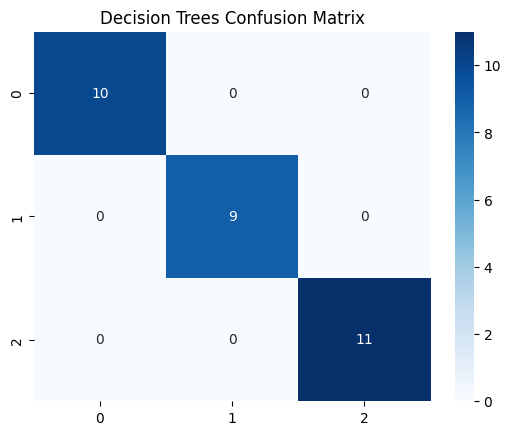

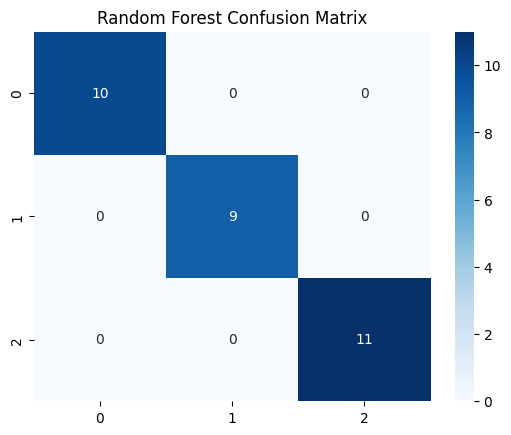

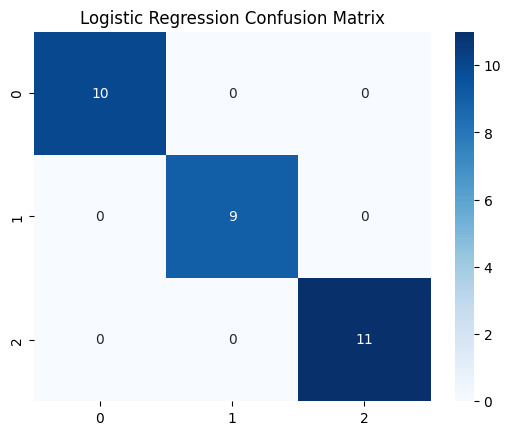

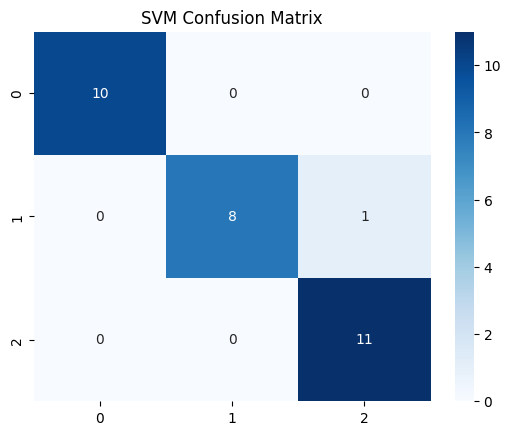

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Trees Confusion Matrix")
plt.show()
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.show()

In [ ]:
new_data = X_test.iloc[0].values.reshape(1, -1)
print(f"Data Point: {new_data}")
dt_prediction = model.predict(new_data)
log_prediction = log_model.predict(new_data)
svm_prediction = svm_model.predict(new_data)
rf_prediction = rf_model.predict(new_data)
print(f"Decision Tree Predicted class: {dt_prediction}")
print(f"Logistic Regression Predicted class: {log_prediction}")
print(f"Support Vector Machine Predicted class: {svm_prediction}")
print(f"Random Forest Predicted class: {rf_prediction}")

Data Point: [[ 0.31099753 -0.59237301  0.53540856  0.00087755]]
Decision Tree Predicted class: [1]
Logistic Regression Predicted class: [1]
Support Vector Machine Predicted class: [1]
Random Forest Predicted class: [1]
